In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('br_me_sic_transferencia.csv')
df.head()

,ano,mes,id_esfera_orcamentaria,nome_esfera_orcamentaria,id_natureza_juridica,nome_natureza_juridica,id_resultado_primario,nome_resultado_primario,id_unidade_organizacional_nivel_0,nome_unidade_organizacional_nivel_0,id_unidade_organizacional_nivel_1,nome_unidade_organizacional_nivel_1,id_unidade_organizacional_nivel_2,nome_unidade_organizacional_nivel_2,id_unidade_organizacional_nivel_3,nome_unidade_organizacional_nivel_3,valor_custo_transferencia
0,2015,5,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,3,PRIMARIO SEM IMPACTO FISCAL,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,2732062.96
1,2015,1,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,3474900.00
2,2015,8,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,19283163.10
3,2015,7,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,3,PRIMARIO SEM IMPACTO FISCAL,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,5130042.70
4,2015,9,1,ORCAMENTO FISCAL,1,EMPRESA PUBLICA,6,DESPESA DISCRICIONARIA DECORRENTE DE EMENDA IN...,26,PRESIDENCIA DA REPUBLICA,1988,"MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACAO",1,FINANCIADORA DE ESTUDOS E PROJETOS,-9,NAO SE APLICA,8543458.31


In [12]:
df["valor_custo_transferencia"].describe()

count    2.935400e+04
mean     1.010271e+07
std      1.232684e+08
min     -6.284670e+08
25%      0.000000e+00
50%      8.878000e+01
75%      5.015714e+05
max      8.956496e+09
Name: valor_custo_transferencia, dtype: float64

<Axes: ylabel='valor_custo_transferencia'>

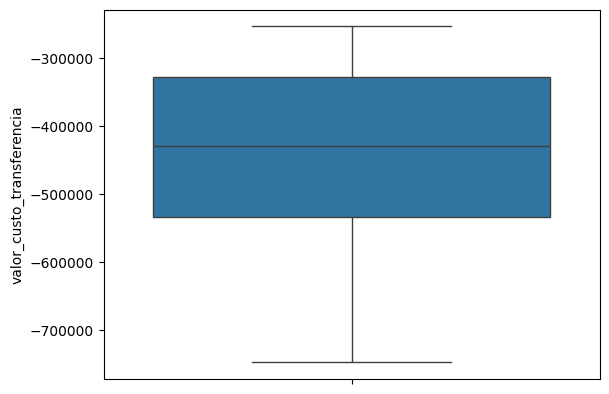

In [13]:
Q1 = df['valor_custo_transferencia'].quantile(0.25)
Q3 = df['valor_custo_transferencia'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR 
limite_superior = Q3 - 1.5 * IQR

df_filtrado = df[(df['valor_custo_transferencia'] >= limite_inferior) & (df['valor_custo_transferencia'] <= limite_superior)]

sns.boxplot(y=df_filtrado['valor_custo_transferencia']) 

In [14]:
df['valor_custo_transferencia'].value_counts()

valor_custo_transferencia
0.00          14317
1500.00         145
500000.00       129
300000.00       123
100000.00       110
              ...  
290798.29         1
294108.29         1
361080.59         1
31372.28          1
5252803.00        1
Name: count, Length: 12276, dtype: int64

In [15]:
df['valor_custo_transferencia'].max()

8956496242.53

In [16]:
df.groupby('nome_unidade_organizacional_nivel_1').agg({'valor_custo_transferencia':['mean']})

,valor_custo_transferencia
,mean
nome_unidade_organizacional_nivel_1,
ADVOCACIA-GERAL DA UNIAO,2.631454e+07
BANCO CENTRAL DO BRASIL,1.772628e+05
CASA CIVIL DA PRESIDENCIA DA REPUBLICA,9.211333e+05
CONTROLADORIA-GERAL DA UNIAO,2.943084e+05
GABINETE DE SEGURANCA INSTITUCIONAL DA PRESIDENCIA DA REPUBLICA,1.496777e+03
...,...
SECRETARIA DE COMUNICACAO SOCIAL DA PRESIDENCIA DA REPUBLICA,1.200000e+05
SECRETARIA DE GOVERNO DA PRESIDENCIA DA REPUBLICA,4.701691e+05


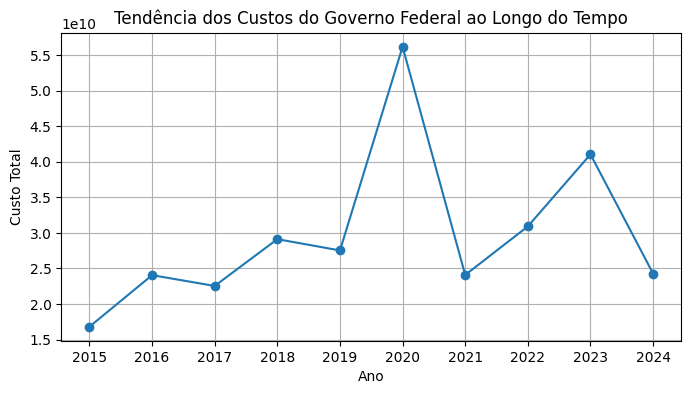

In [17]:

# Converte valores não numéricos para NaN e depois para inteiro, removendo linhas com valores não válidos
# Exemplo de criação de df_agrupado
df_agrupado = df.groupby('ano')['valor_custo_transferencia'].sum().reset_index()
df_agrupado = df_agrupado.dropna(subset=['ano'])  # Remove linhas com NaN na coluna 'ano'
df_agrupado['ano'] = df_agrupado['ano'].astype(int)  # Converte para inteiro

# Plotando o gráfico com o eixo x apenas com o ano
plt.figure(figsize=(8, 4))
plt.plot(df_agrupado['ano'], df_agrupado['valor_custo_transferencia'], marker='o')
plt.title('Tendência dos Custos do Governo Federal ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Custo Total')
plt.grid()
plt.xticks(df_agrupado['ano'])  # Define os anos como valores dos ticks no eixo x
plt.show()


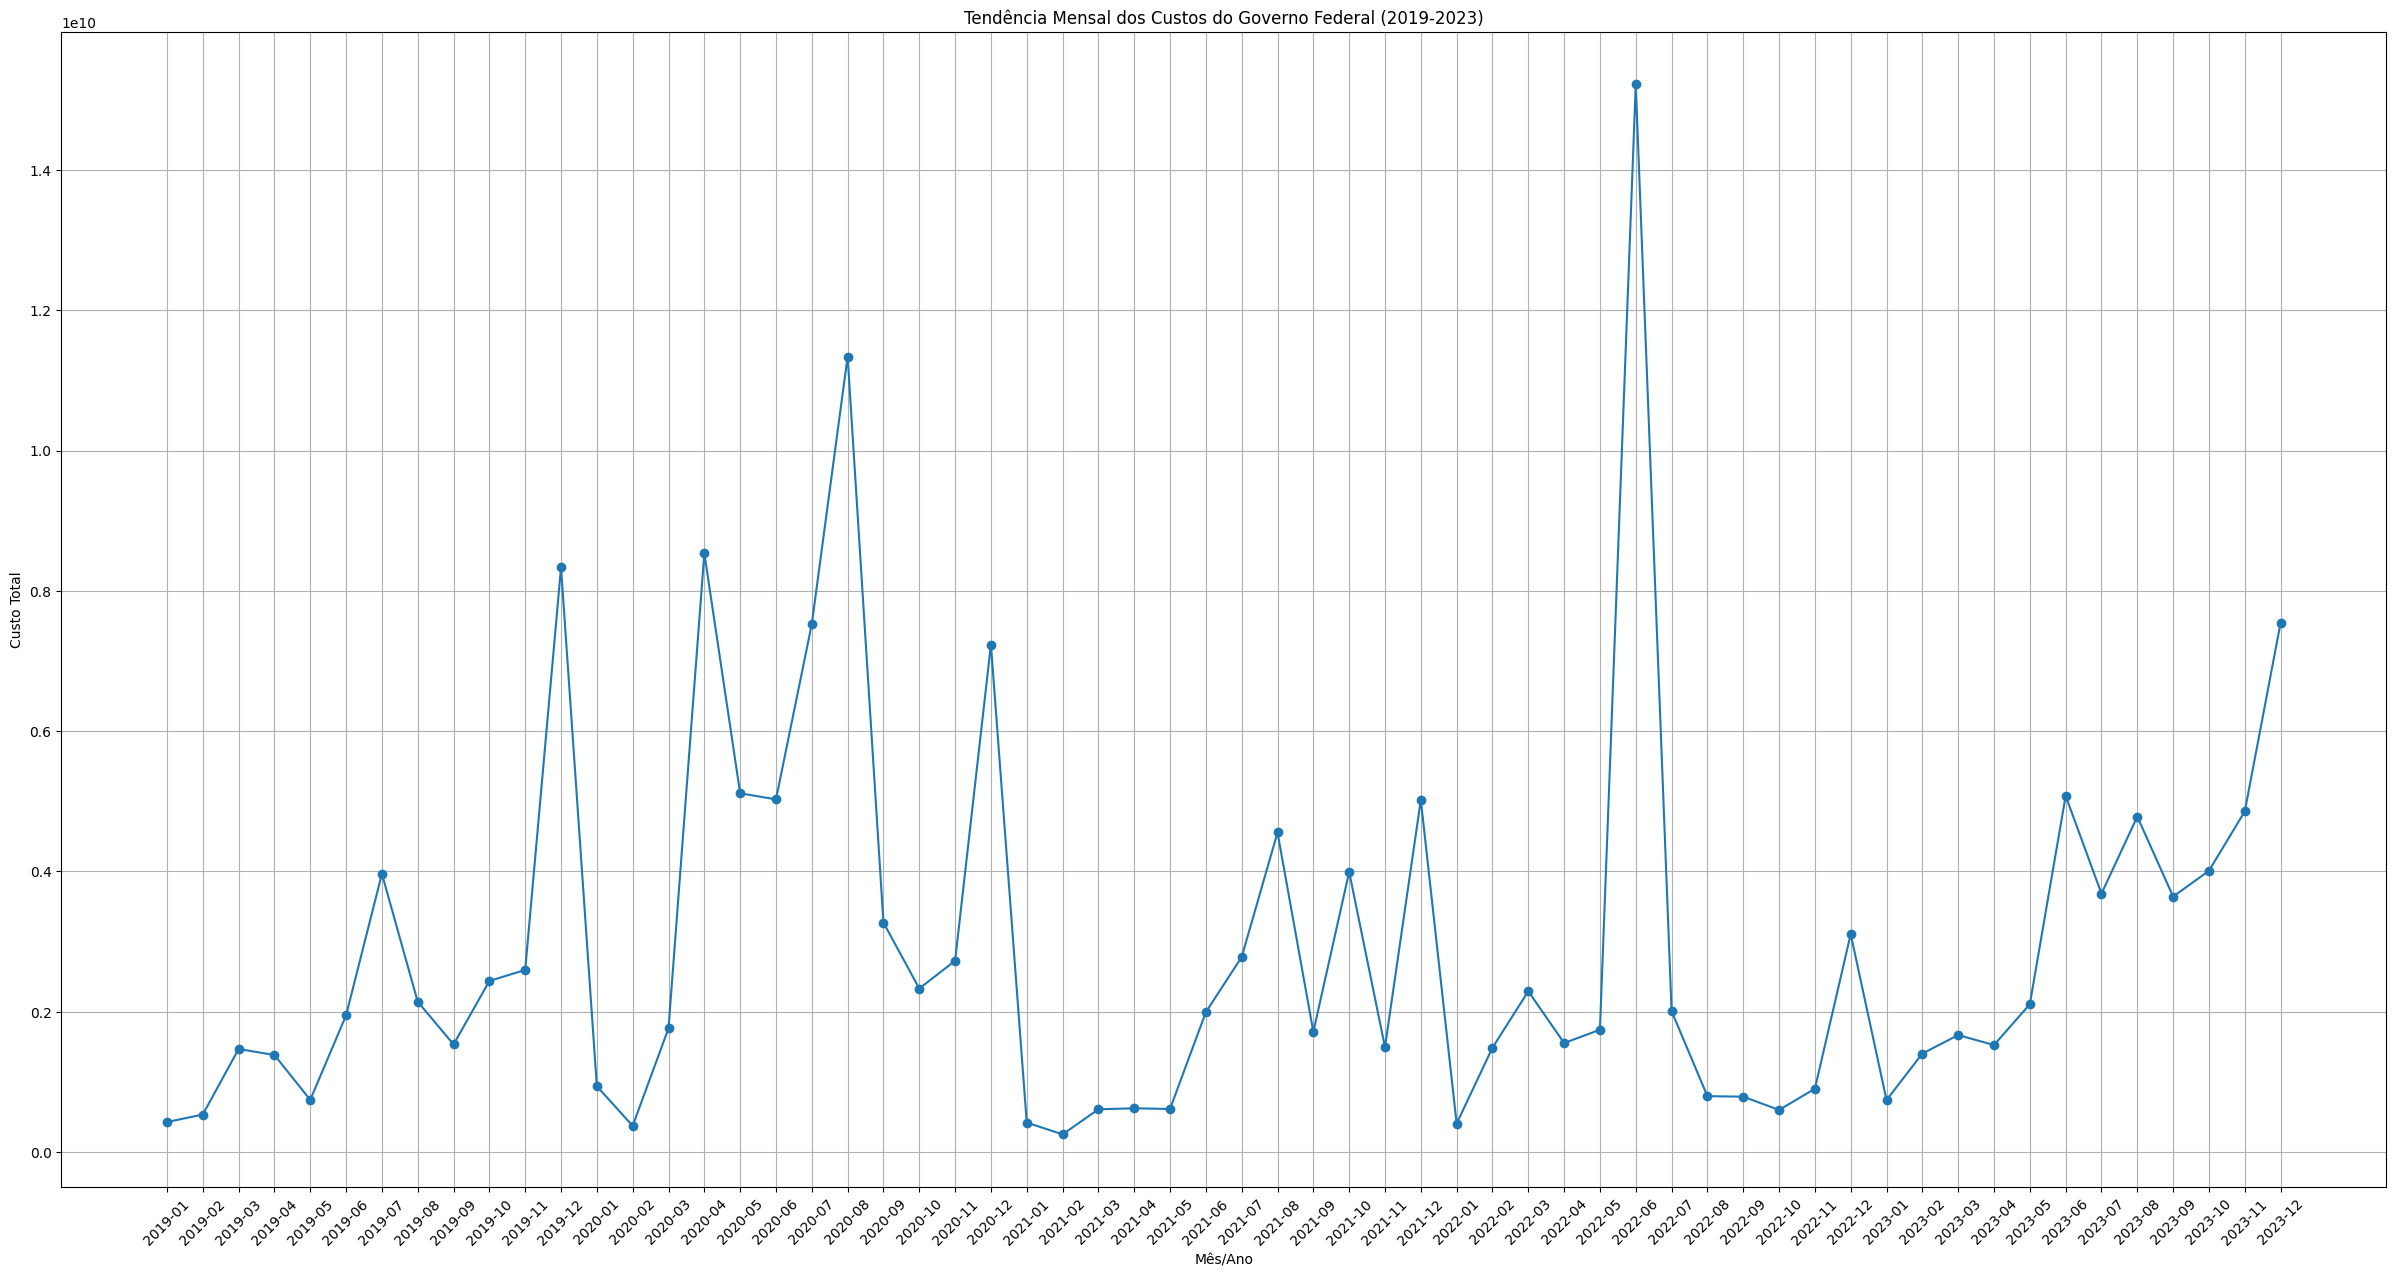

In [18]:
df_periodo = df[(df['ano'] >= 2019) & ((df['ano'] < 2023) | ((df['ano'] == 2023) & (df['mes'] <= 12)))]

df_agrupado_mensal = df_periodo.groupby(['ano', 'mes'])['valor_custo_transferencia'].sum().reset_index()

df_agrupado_mensal['data'] = pd.to_datetime(df_agrupado_mensal['ano'].astype(str) + '-' + df_agrupado_mensal['mes'].astype(str) + '-01')

df_agrupado_mensal['ano_mes'] = df_agrupado_mensal['ano'].astype(str) + '-' + df_agrupado_mensal['mes'].astype(str).str.zfill(2)

plt.figure(figsize=(30, 15))
plt.plot(df_agrupado_mensal['ano_mes'], df_agrupado_mensal['valor_custo_transferencia'], marker='o')

plt.title('Tendência Mensal dos Custos do Governo Federal (2019-2023)')
plt.xlabel('Mês/Ano')
plt.ylabel('Custo Total')
plt.grid()

plt.xticks(rotation=45)
plt.show()


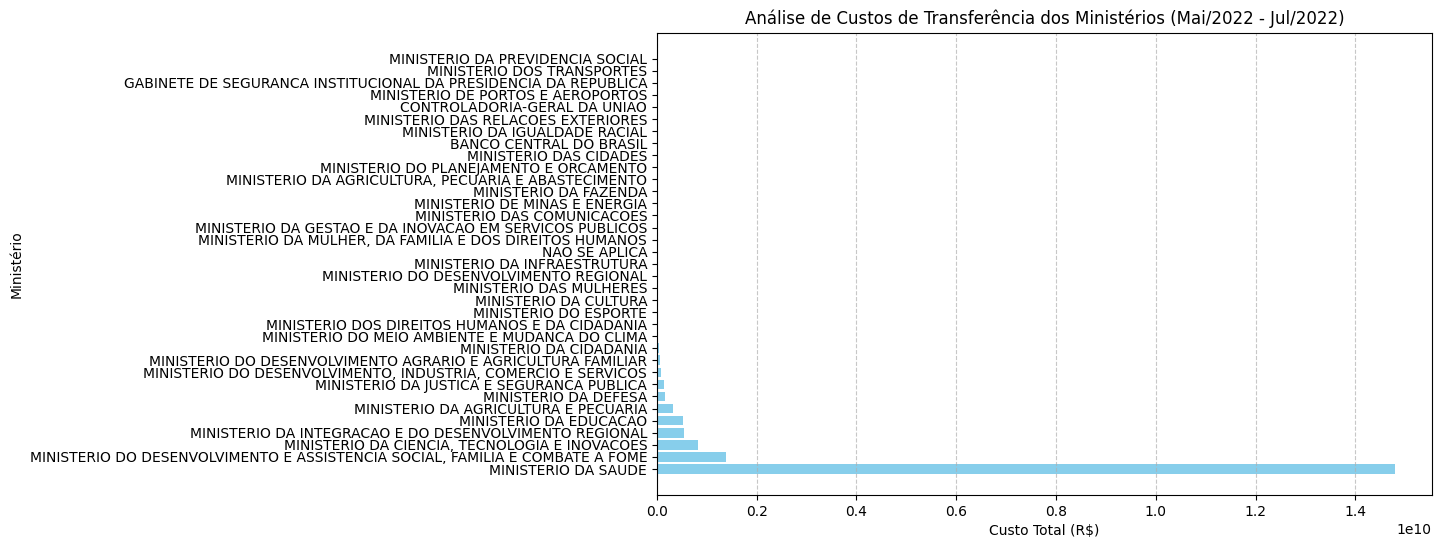

In [19]:
df_periodo_ministerios = df[(df['ano'] == 2022) & (df['mes'].between(5, 7))]

df_agrupado_ministerios = df_periodo_ministerios.groupby('nome_unidade_organizacional_nivel_1')['valor_custo_transferencia'].sum().reset_index()

df_agrupado_ministerios = df_agrupado_ministerios.sort_values(by='valor_custo_transferencia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_agrupado_ministerios['nome_unidade_organizacional_nivel_1'], df_agrupado_ministerios['valor_custo_transferencia'], color='skyblue')
plt.title('Análise de Custos de Transferência dos Ministérios (Mai/2022 - Jul/2022)')
plt.xlabel('Custo Total (R$)')
plt.ylabel('Ministério')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

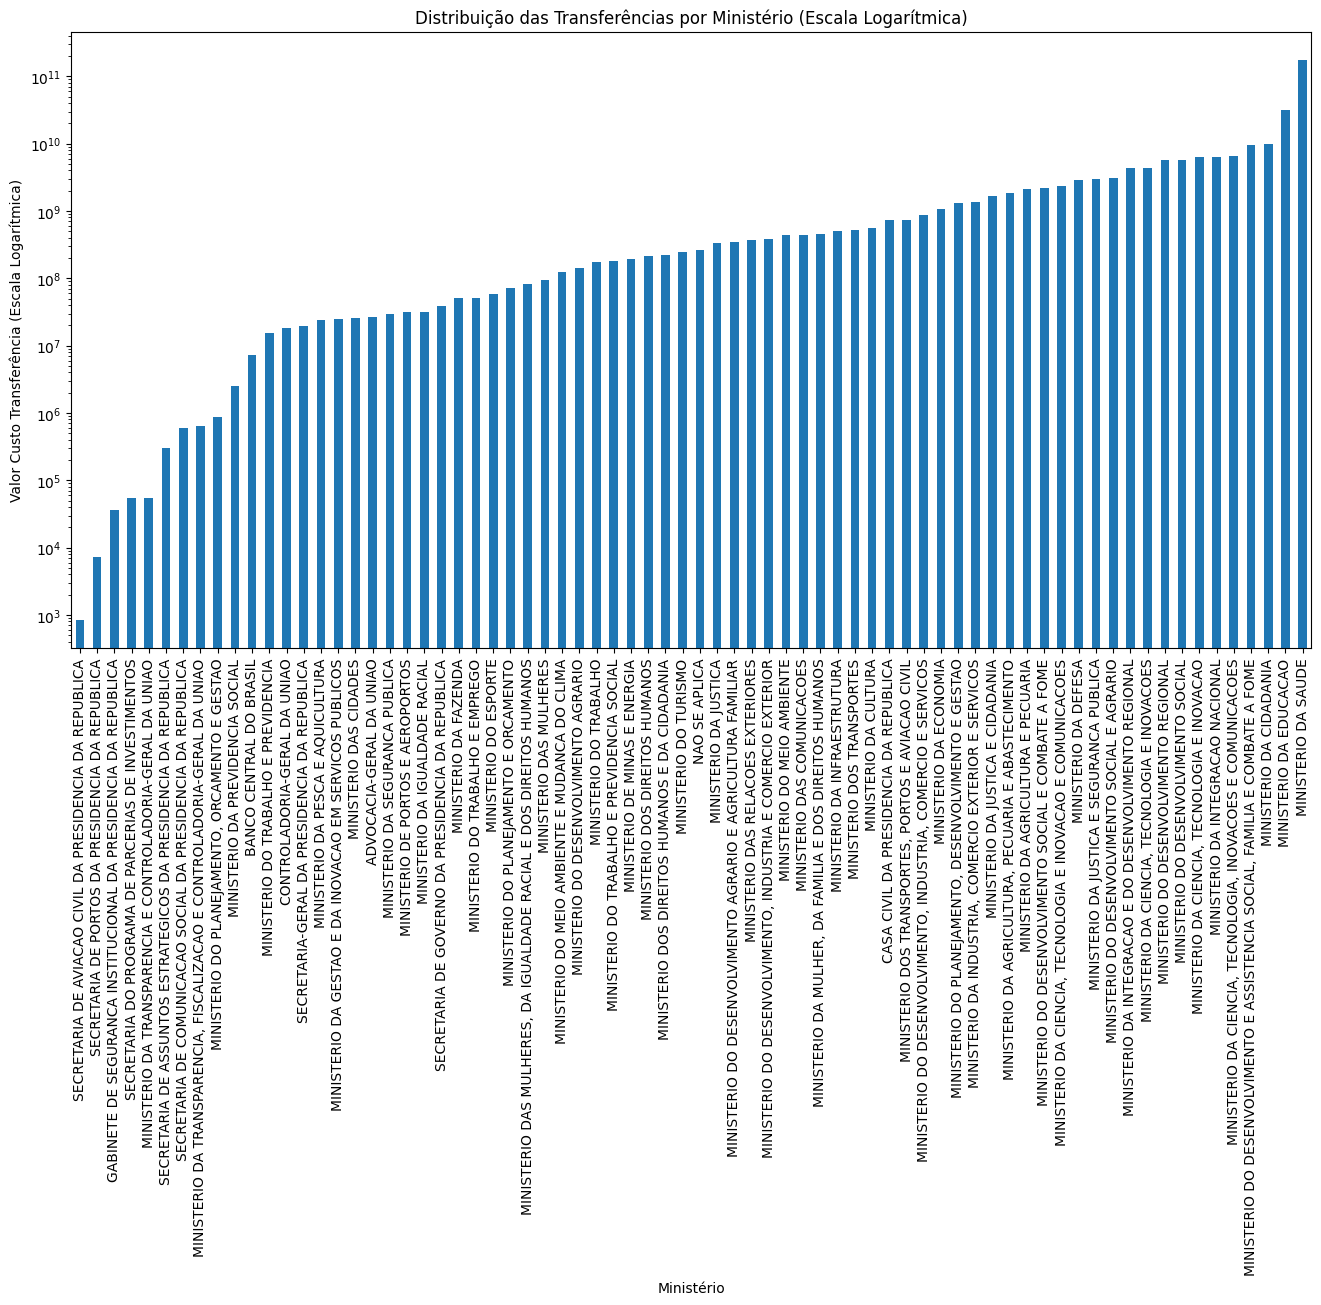

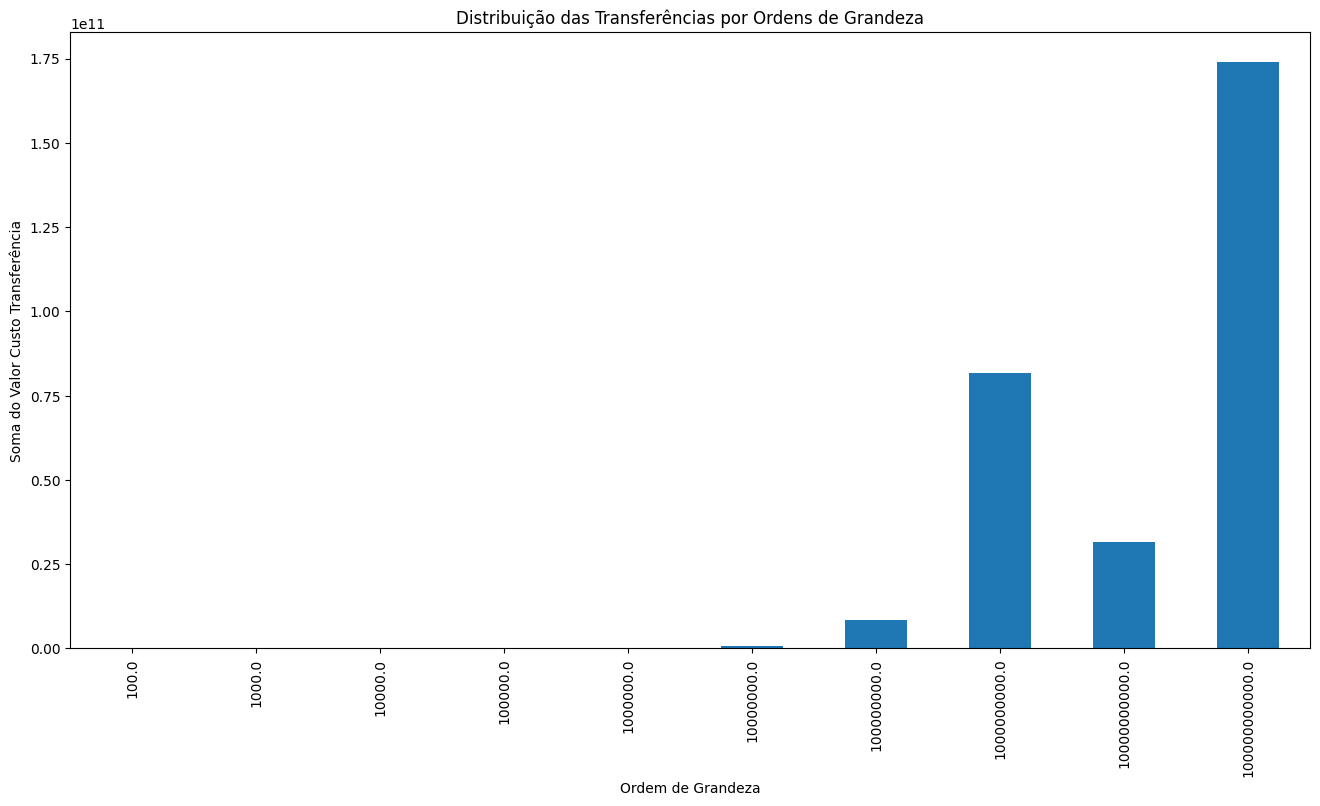

In [20]:


custos_por_categoria = df.groupby('nome_unidade_organizacional_nivel_1')['valor_custo_transferencia'].sum()
custos_por_categoria = custos_por_categoria[custos_por_categoria < 1e13]  
custos_por_categoria = custos_por_categoria.sort_values(ascending=True)

plt.figure(figsize=(16, 8))
custos_por_categoria.plot(kind='bar', logy=True)
plt.title('Distribuição das Transferências por Ministério (Escala Logarítmica)')
plt.xlabel('Ministério')
plt.ylabel('Valor Custo Transferência (Escala Logarítmica)')
plt.show()

ordens_de_grandeza = 10 ** np.floor(np.log10(custos_por_categoria))
custos_agrupados = custos_por_categoria.groupby(ordens_de_grandeza).sum()

plt.figure(figsize=(16, 8))
custos_agrupados.plot(kind='bar')
plt.title('Distribuição das Transferências por Ordens de Grandeza')
plt.xlabel('Ordem de Grandeza')
plt.ylabel('Soma do Valor Custo Transferência')
plt.show()



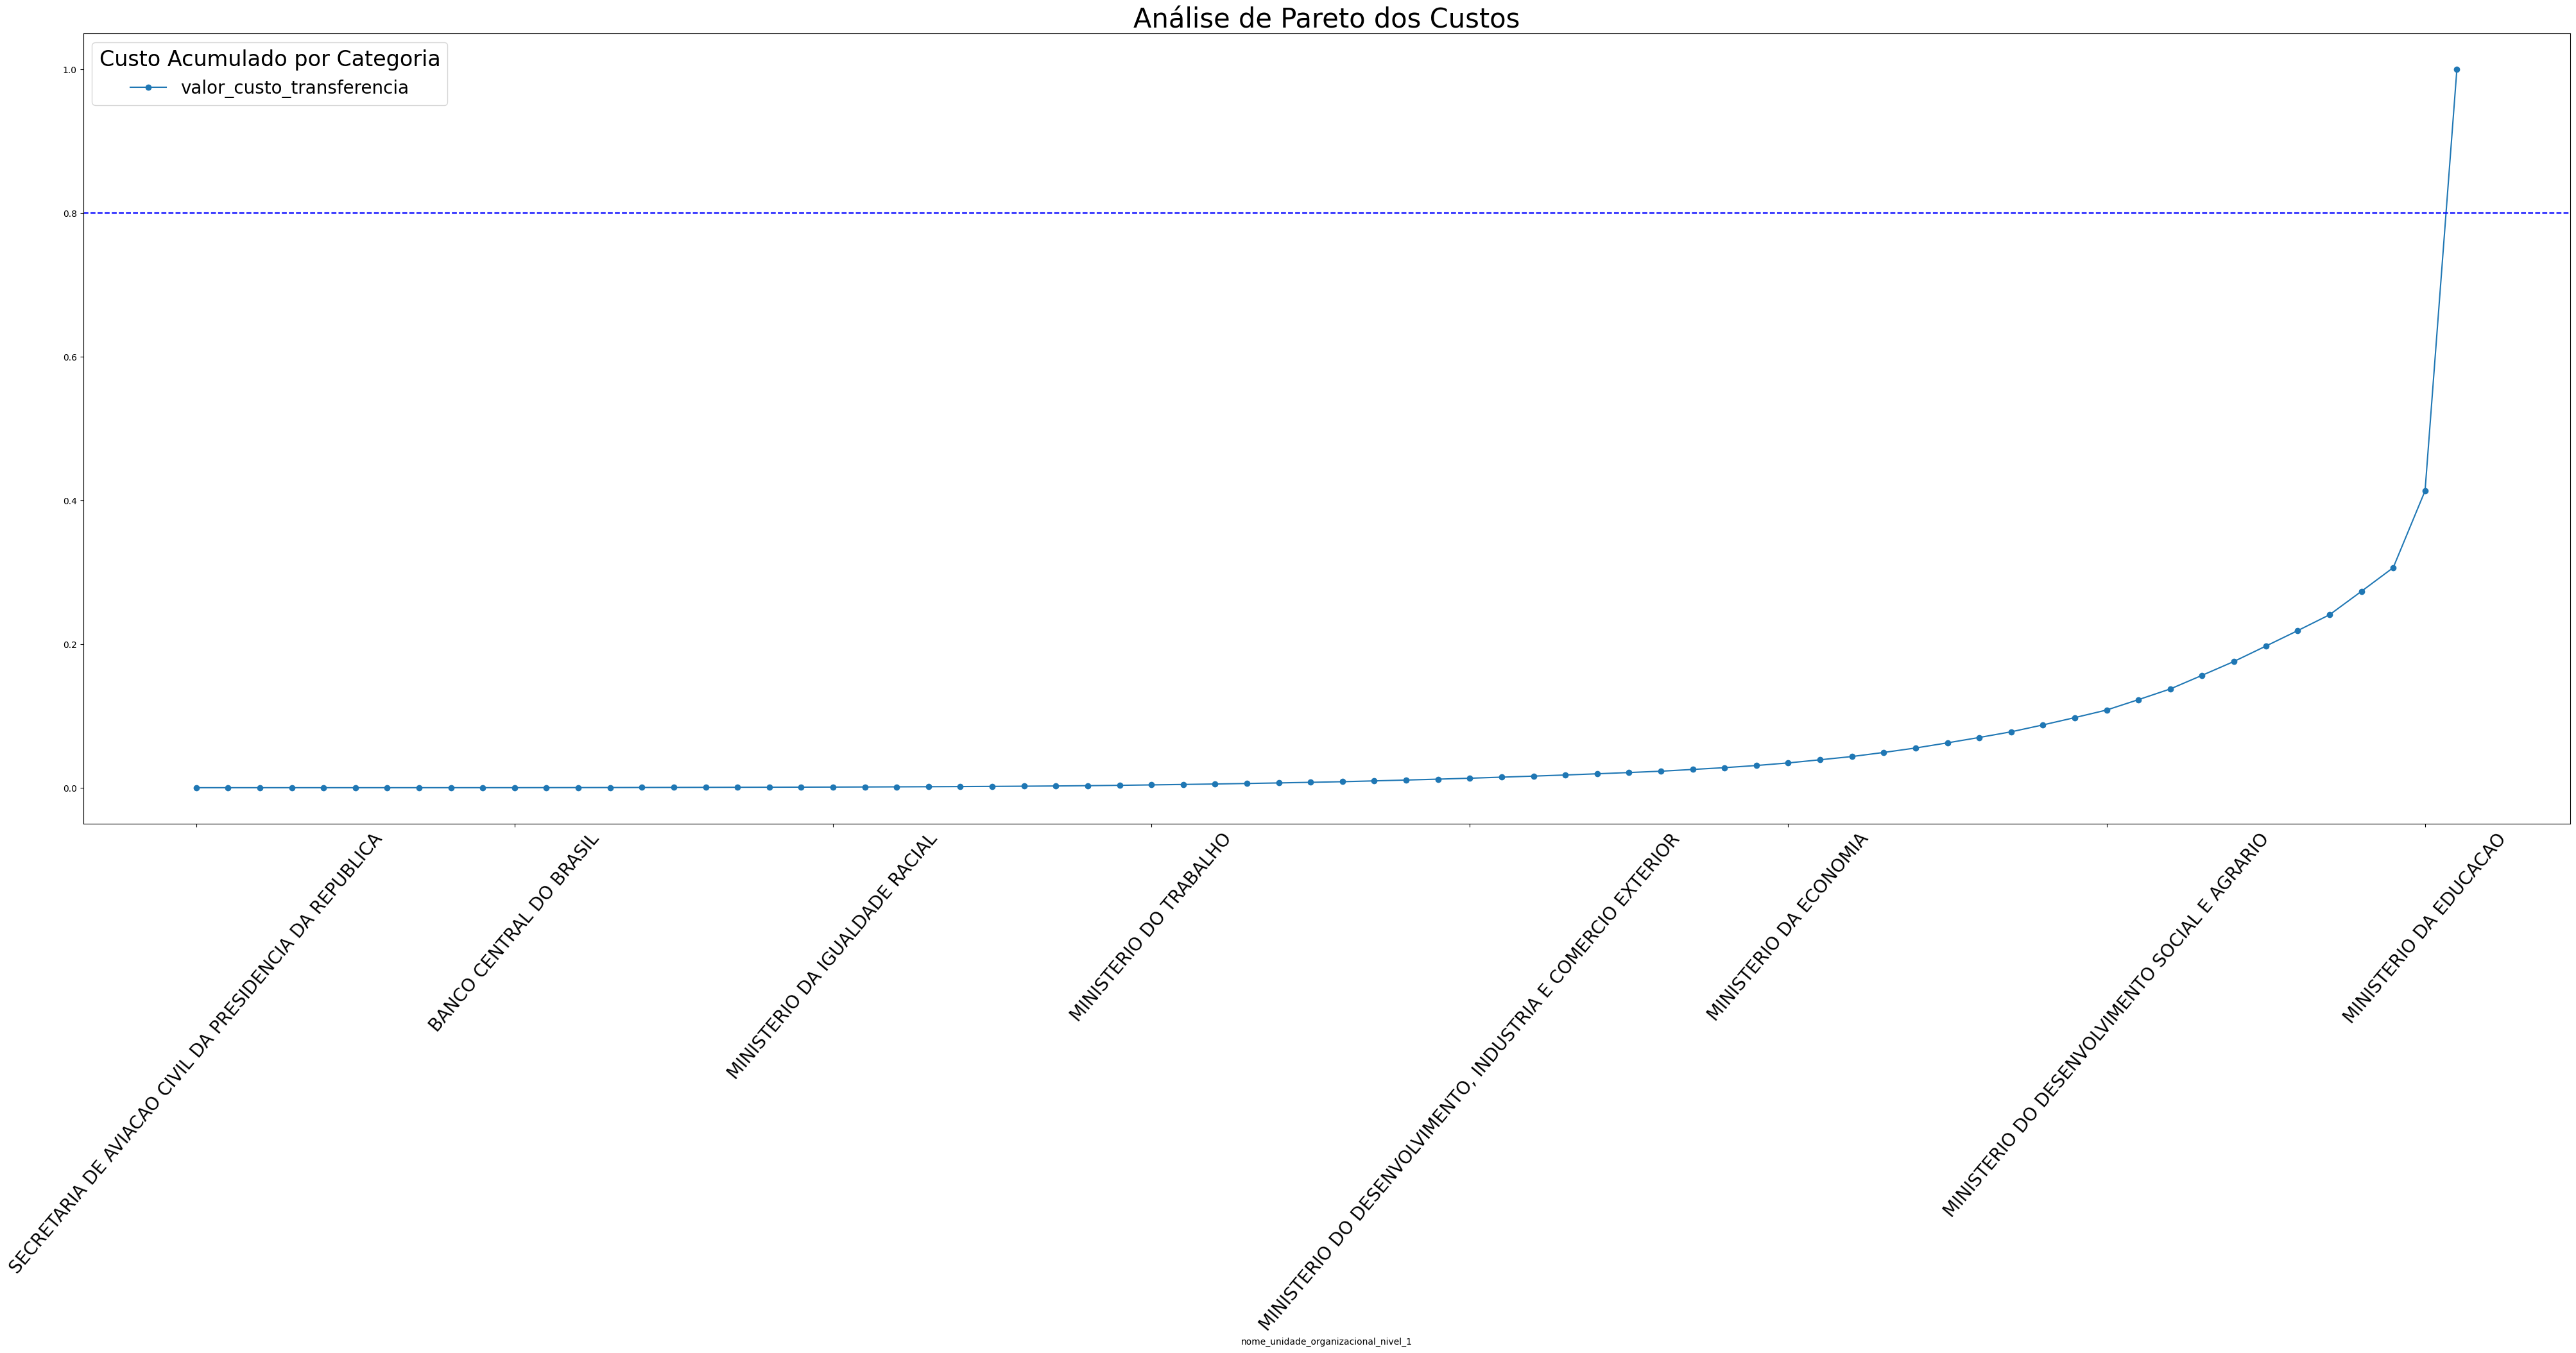

In [75]:
total = custos_por_categoria.sum()
plt.figure(figsize=(50, 16))
custos_por_categoria.cumsum().div(total).plot(kind='line', marker='o')
plt.axhline(0.8, color='blue', linestyle="--")
plt.title("Análise de Pareto dos Custos", fontsize=30)
plt.legend(title='Custo Acumulado por Categoria', fontsize=20, title_fontsize=24, loc='best')
plt.xticks(rotation=50, fontsize=20)
plt.show()

In [22]:
df.groupby('nome_natureza_juridica').agg({'valor_custo_transferencia':['mean']})

,valor_custo_transferencia
,mean
nome_natureza_juridica,
ADMINISTRACAO DIRETA,2.359702e+07
AUTARQUIA,2.718268e+06
EMPRESA PUBLICA,1.172637e+07
FUNDACAO PUBLICA,1.554383e+06
SOCIEDADE DE ECONOMIA MISTA,1.499229e+04


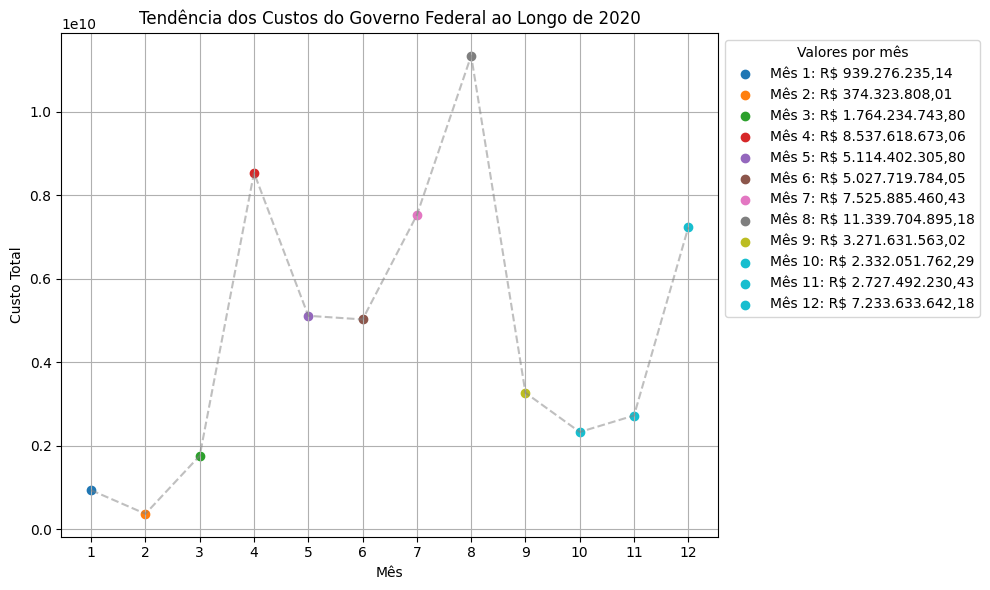

In [74]:

import locale
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

df_ano_2020 = df[df['ano'] == 2020]
df_agrupado = df_ano_2020.groupby('mes')['valor_custo_transferencia'].sum().reset_index()
df_agrupado = df_agrupado.dropna(subset=['mes'])  
df_agrupado['mes'] = df_agrupado['mes'].astype(int)

plt.figure(figsize=(10, 6))

colors = plt.cm.tab10(range(len(df_agrupado)))

plt.plot(df_agrupado['mes'], df_agrupado['valor_custo_transferencia'], color='gray', linestyle='--', alpha=0.5)

for i, (x, y) in enumerate(zip(df_agrupado['mes'], df_agrupado['valor_custo_transferencia'])):
    plt.scatter(x, y, color=colors[i], label=f'Mês {x}: {locale.currency(y, grouping=True)}')

plt.title('Tendência dos Custos do Governo Federal ao Longo de 2020')
plt.xlabel('Mês')
plt.ylabel('Custo Total')
plt.grid()
plt.xticks(df_agrupado['mes'])

plt.legend(title='Valores por mês', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



In [67]:

result = df_ano_2020.groupby(['nome_natureza_juridica', 'nome_unidade_organizacional_nivel_1', 'nome_unidade_organizacional_nivel_2', 'nome_esfera_orcamentaria']).agg({'valor_custo_transferencia': 'mean'})
result_reset = result.reset_index()
result_reset['total_valor_custo_transferencia'] = result_reset.groupby('nome_natureza_juridica')['valor_custo_transferencia'].transform('sum')
result_reset

,nome_natureza_juridica,nome_unidade_organizacional_nivel_1,nome_unidade_organizacional_nivel_2,nome_esfera_orcamentaria,valor_custo_transferencia,total_valor_custo_transferencia
0,ADMINISTRACAO DIRETA,ADVOCACIA-GERAL DA UNIAO,SECRETARIA-GERAL DE ADMINISTRACAO,ORCAMENTO FISCAL,2.631454e+07,8.929643e+08
1,ADMINISTRACAO DIRETA,CONTROLADORIA-GERAL DA UNIAO,SECRETARIA-EXECUTIVA,ORCAMENTO FISCAL,4.855160e+05,8.929643e+08
2,ADMINISTRACAO DIRETA,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",INSTITUTO NACIONAL DE METEOROLOGIA,ORCAMENTO FISCAL,6.997504e+05,8.929643e+08
3,ADMINISTRACAO DIRETA,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",SECRETARIA DE AGRICULTURA FAMILIAR E COOPERATI...,ORCAMENTO DE SEGURIDADE SOCIAL,2.320100e+05,8.929643e+08
4,ADMINISTRACAO DIRETA,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",SECRETARIA DE AGRICULTURA FAMILIAR E COOPERATI...,ORCAMENTO FISCAL,2.276924e+06,8.929643e+08
...,...,...,...,...,...,...
205,FUNDACAO PUBLICA,MINISTERIO DO TURISMO,FUNDACAO CULTURAL PALMARES,ORCAMENTO FISCAL,1.275697e+05,1.480444e+07
206,FUNDACAO PUBLICA,MINISTERIO DO TURISMO,FUNDACAO NACIONAL DE ARTES,ORCAMENTO FISCAL,5.363939e+05,1.480444e+07
207,SOCIEDADE DE ECONOMIA MISTA,MINISTERIO DAS COMUNICACOES,TELECOMUNICACOES BRASILEIRAS S.A.,ORCAMENTO FISCAL,2.233506e+04,4.906301e+04
208,SOCIEDADE DE ECONOMIA MISTA,MINISTERIO DE MINAS E ENERGIA,INDUSTRIAS NUCLEARES DO BRASIL S/A,ORCAMENTO FISCAL,2.472795e+04,4.906301e+04


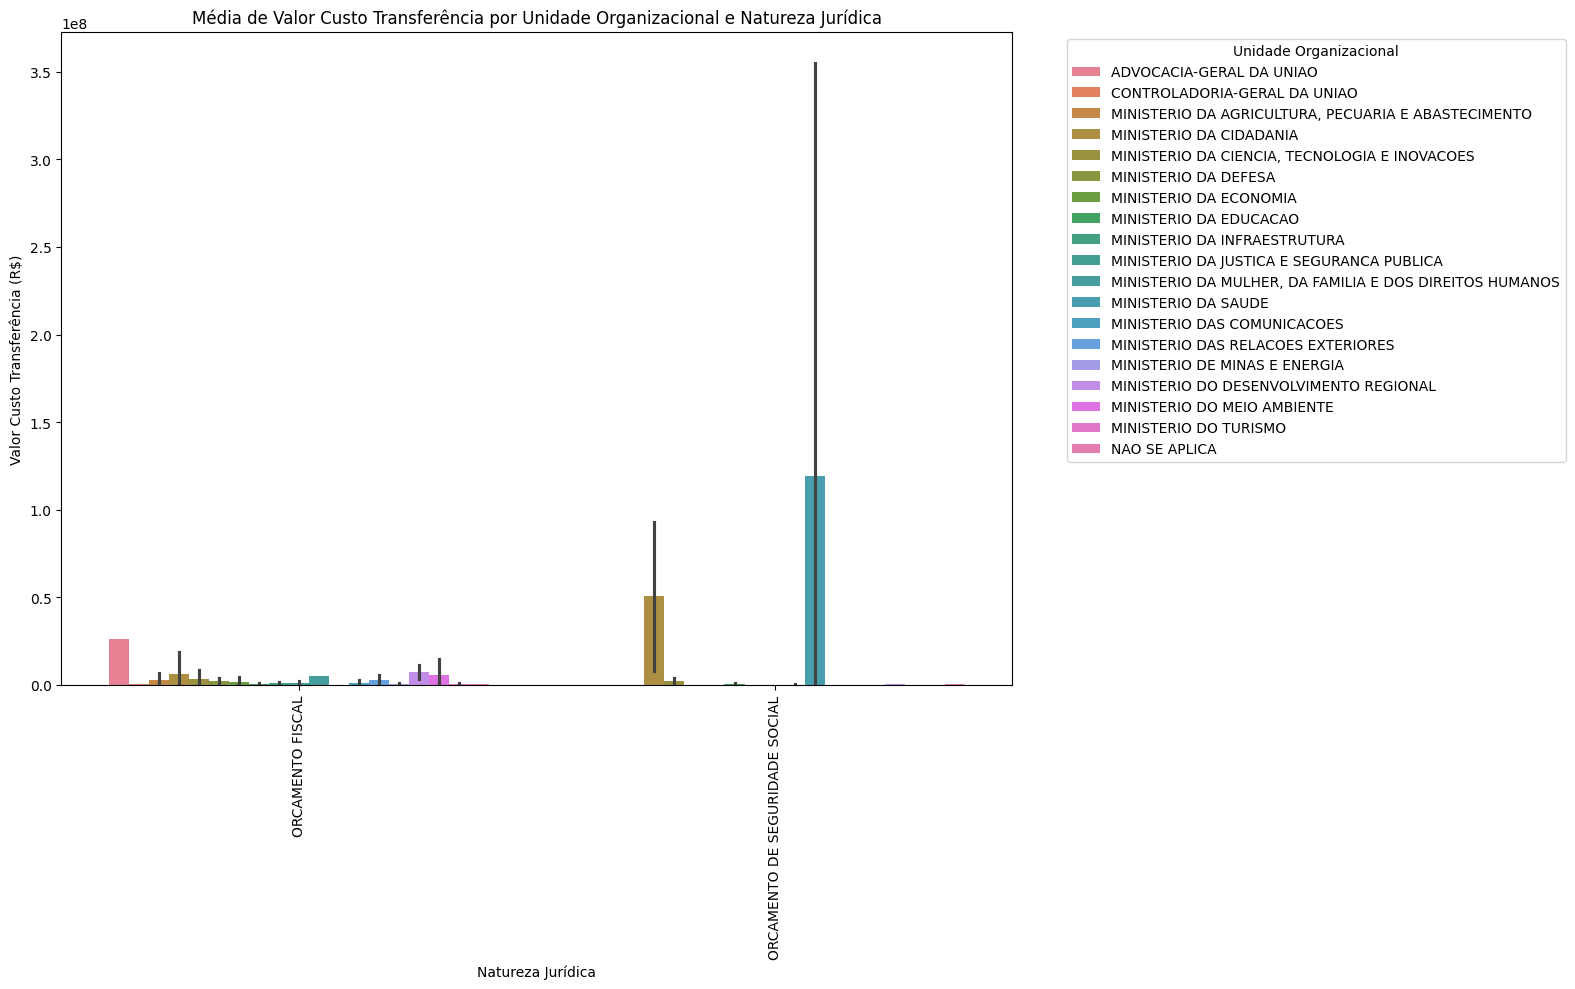

In [69]:


# Ordenar o DataFrame por 'nome_natureza_juridica' e 'valor_custo_transferencia'
plt.figure(figsize=(16, 10))
sns.barplot(x='nome_esfera_orcamentaria', y='valor_custo_transferencia', hue='nome_unidade_organizacional_nivel_1', data=result_reset)

# Adicionando título e rótulos
plt.title('Média de Valor Custo Transferência por Unidade Organizacional e Natureza Jurídica')
plt.xlabel('Natureza Jurídica')
plt.ylabel('Valor Custo Transferência (R$)')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor leitura
plt.legend(title='Unidade Organizacional', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

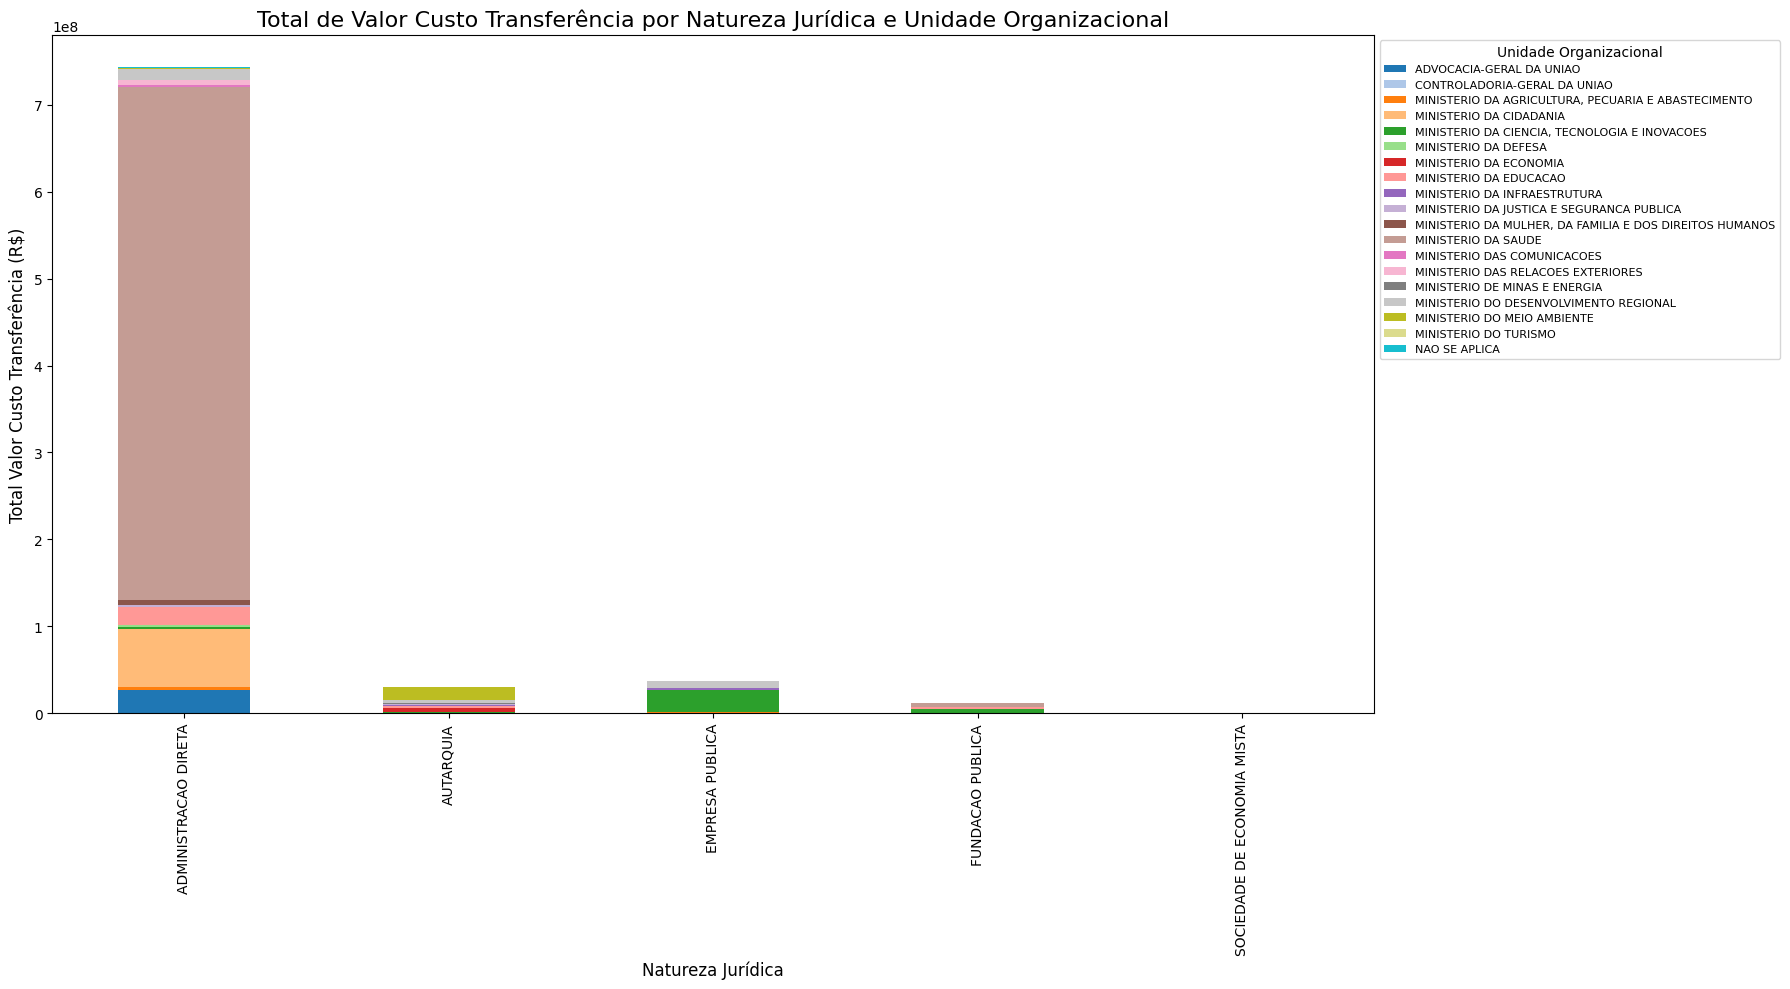

In [58]:
# Configurando uma paleta de cores com cores distintas
num_categories = len(result_reset['nome_unidade_organizacional_nivel_1'].unique())
colors = sns.color_palette("tab20", num_categories)  # Usando tab20 que suporta até 20 cores distintas

# Pivotando o DataFrame para criar a tabela necessária para o gráfico
pivot_data = result_reset.pivot_table(
    index='nome_natureza_juridica',
    columns='nome_unidade_organizacional_nivel_1',
    values='valor_custo_transferencia',
    aggfunc='sum'
)

# Criando o gráfico de barras empilhadas com cores ajustadas
plt.figure(figsize=(18, 10))
ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 10),
    color=colors
)

# Adicionando título e rótulos
plt.title('Total de Valor Custo Transferência por Natureza Jurídica e Unidade Organizacional', fontsize=16)
plt.xlabel('Natureza Jurídica', fontsize=12)
plt.ylabel('Total Valor Custo Transferência (R$)', fontsize=12)
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor leitura

# Ajustando layout e legenda
plt.legend(
    title='Unidade Organizacional',
    bbox_to_anchor=(1, 1),
    loc='upper left',
    fontsize=8
)
plt.tight_layout()
plt.show()


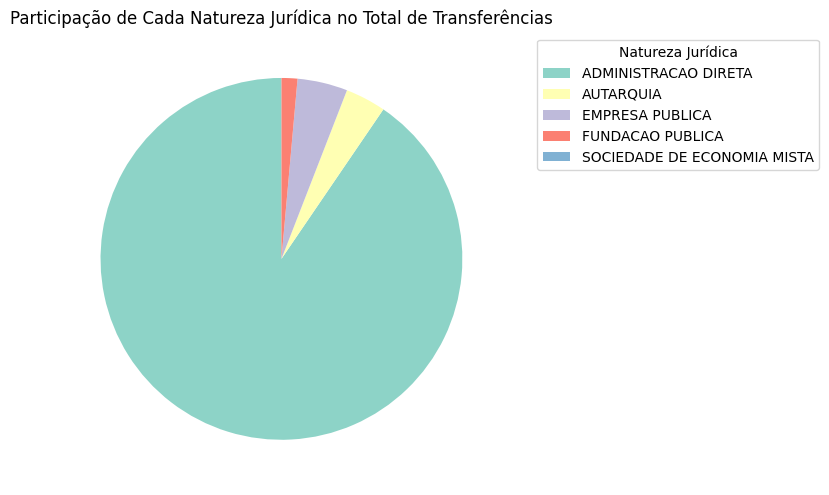

In [61]:

# Calculando a soma total por 'nome_natureza_juridica'
total_by_natureza = result_reset.groupby('nome_natureza_juridica')['total_valor_custo_transferencia'].max()

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
ax = total_by_natureza.plot(kind='pie', startangle=90, colors=sns.color_palette("Set3", len(total_by_natureza)), labels=None)

# Adicionando título
plt.title('Participação de Cada Natureza Jurídica no Total de Transferências')

# Adicionando a legenda
plt.legend(total_by_natureza.index, title='Natureza Jurídica', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('')  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()


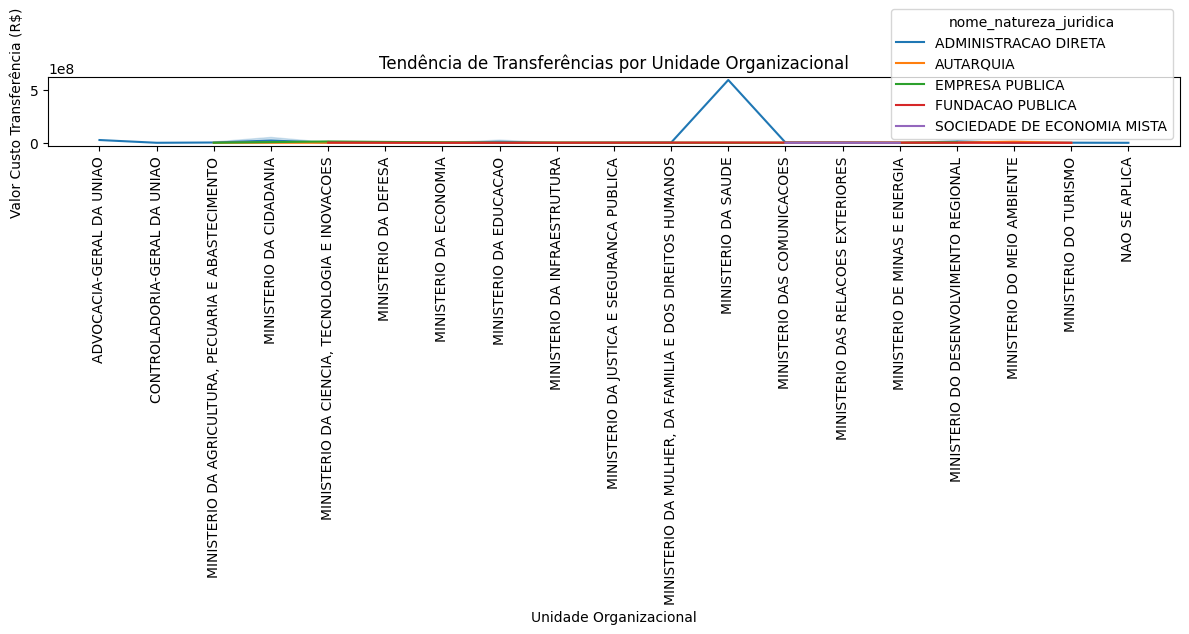

In [72]:
# Exemplo com gráfico de linha (caso os dados estejam temporais, como por mês ou ano)
plt.figure(figsize=(12, 6))

sns.lineplot(x='nome_unidade_organizacional_nivel_1', y='valor_custo_transferencia', hue='nome_natureza_juridica', data=result_reset)

# Adicionando título e rótulos
plt.title('Tendência de Transferências por Unidade Organizacional')
plt.xlabel('Unidade Organizacional')
plt.ylabel('Valor Custo Transferência (R$)')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor leitura

plt.tight_layout()
plt.show()